<a href="https://colab.research.google.com/github/MasterMind-hack/AI-Portfolio-Santosh-Adhikari/blob/main/Week3_Protfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
csvfile="titanic (1).csv"
#please note your csvfilePAth would be the path where you uploaded and saved the diabetesN.csv
csvfilePath='/content/'+csvfile
pima = pd.read_csv(csvfilePath)
pima.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [8]:
pima['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


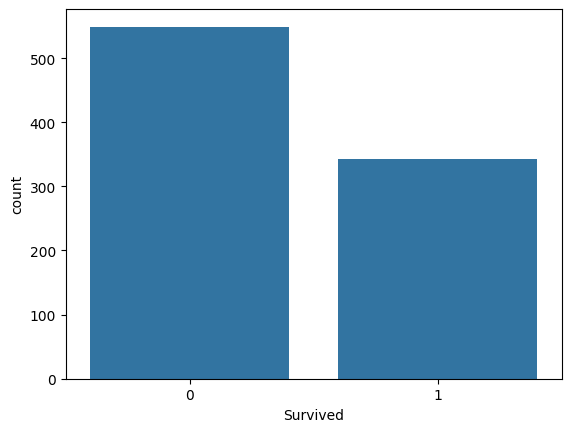

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Survived', data =pima )

# Show the plot
plt.show()

In [10]:
count_no_sub = len(pima[pima['Survived']==0])
count_sub = len(pima[pima['Survived']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Survival is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Survival", pct_of_sub*100)

percentage of no Survival is 61.61616161616161
percentage of Survival 38.38383838383838


In [12]:
pima.groupby('Survived').mean(numeric_only=True)

,PassengerId,Pclass,Age,Fare
Survived,,,,
0,447.016393,2.531876,30.626179,22.117887
1,444.368421,1.950292,28.343690,48.395408


In [14]:
#split dataset in features and target variable
feature_cols =["Pclass", "Sex", "Age", "Fare"]
X = pima[feature_cols] # Features

y = pima.Survived # Target variable
X
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [15]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split

# Split X and y into training and testing sets (re-initialize for robustness)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# --- Preprocessing steps ---

# Handle missing 'Age' values using imputation (mean)
# Calculate mean from training data to avoid data leakage
mean_age_train = X_train['Age'].mean()
X_train['Age'] = X_train['Age'].fillna(mean_age_train)
X_test['Age'] = X_test['Age'].fillna(mean_age_train) # Use training mean for test set

# Handle categorical 'Sex' column using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True, dtype=int)

# Align columns - crucial after get_dummies if categories are not identical across train/test
# (e.g., if X_test happens to only have 'female' but no 'male', it wouldn't create 'Sex_male' column)
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols] # Ensure column order is also the same

# instantiate the model (using the default parameters)
# Added solver='liblinear' for better performance and to suppress potential warnings for small datasets
logreg = LogisticRegression(random_state=16, solver='liblinear')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [18]:
print(y_test.value_counts())

Survived
0    137
1     86
Name: count, dtype: int64


In [19]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  18],
       [ 32,  54]])

Text(0.5, 427.9555555555555, 'Predicted label')

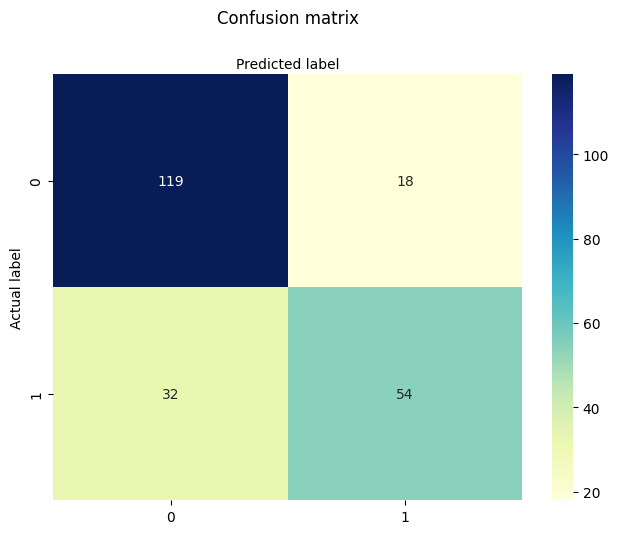

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.75
0.627906976744186


In [22]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.87      0.83       137
   with diabetes       0.75      0.63      0.68        86

        accuracy                           0.78       223
       macro avg       0.77      0.75      0.75       223
    weighted avg       0.77      0.78      0.77       223



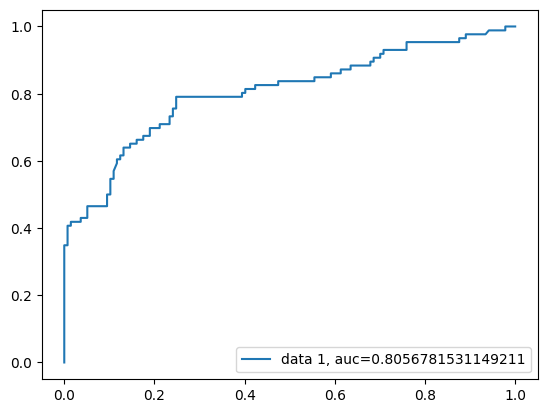

In [23]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**using SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Make a copy of X to preprocess for SMOTE to avoid modifying the original X if it's used elsewhere
X_processed = X.copy()

# Impute missing 'Age' values with the mean of the entire Age column in X
X_processed['Age'] = X_processed['Age'].fillna(X_processed['Age'].mean())

# One-hot encode the 'Sex' column
X_processed = pd.get_dummies(X_processed, columns=['Sex'], drop_first=True, dtype=int)

X_resampled, y_resampled = SMOTE().fit_resample(X_processed, y)

In [27]:
y_resampled.value_counts()

,count
Survived,
0,549
1,549


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)

In [31]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  18],
       [ 32,  54]])

Text(0.5, 427.9555555555555, 'Predicted label')

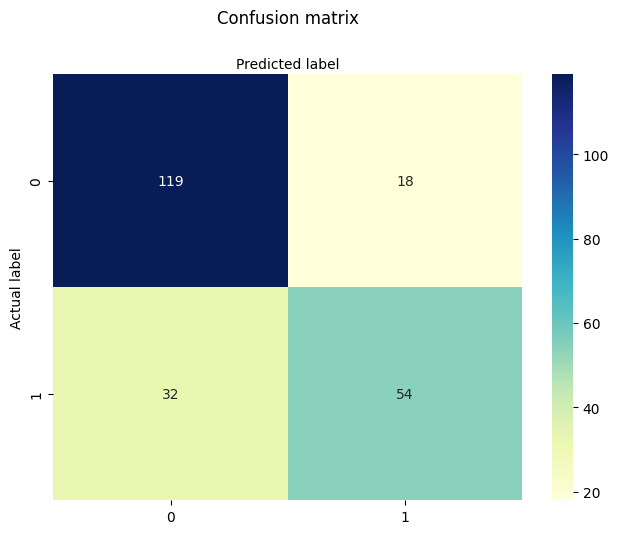

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.75
0.627906976744186


In [34]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.87      0.83       137
   with diabetes       0.75      0.63      0.68        86

        accuracy                           0.78       223
       macro avg       0.77      0.75      0.75       223
    weighted avg       0.77      0.78      0.77       223



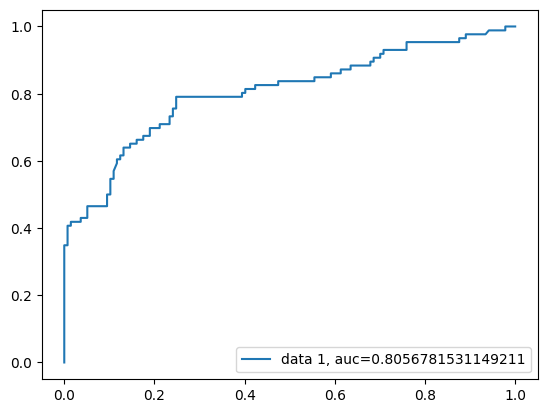

In [35]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()